# Homework 5


##Homework 5.1 A bigram is the combination of words. Find the 10 most common bigrams from the text. Order counts in the bigram combination for example "in the" is not the same bigram as "the in"

In [ ]:
# %load MRbigramfreqCount.py
import pandas as pd
import numpy as np
import matplotlib as mpl
import mrjob as mr
from mrjob.job import MRJob
import re

WORD_RE = re.compile(r"[\w']+")

class MRbigramfreqCount(MRJob):

    def mapper(self, _, line):
        
        lastword=""
        for word in WORD_RE.findall(line):
            if  lastword !="" and word !="":           
                yield (lastword.lower(),word.lower()), 1
            lastword=word

    def combiner(self, bigram, counts):
        yield bigram, sum(counts)

    def reducer(self,bigram, counts):
        yield bigram, sum(counts)


if __name__ == '__main__':
    MRbigramfreqCount.run()

In [61]:
%%capture MRbigramfreqCount
run MRbigramfreqCount.py ws5.txt


INFO:mrjob.conf:No configs found; falling back on auto-configuration
INFO:mrjob.runner:Creating temp directory c:\users\srira\appdata\local\temp\MRbigramfreqCount.sriram.20171017.215425.805000
INFO:mrjob.sim:Running step 1 of 1...
INFO:mrjob.runner:Streaming final output from c:\users\srira\appdata\local\temp\MRbigramfreqCount.sriram.20171017.215425.805000\output...
INFO:mrjob.runner:Removing temp directory c:\users\srira\appdata\local\temp\MRbigramfreqCount.sriram.20171017.215425.805000...


In [62]:
with open('MRbigramfreqCount.txt', 'w') as f:
    f.write(MRbigramfreqCount.stdout)


In [63]:
BigramFile = pd.read_csv("MRbigramfreqCount.txt", sep="\t", header=None)
sort_val = BigramFile.sort_values(1, ascending=False)
sort_val[[0,1]].head(10)

,0,1
252901,"[""of"", ""the""]",13037
29195,"[""and"", ""the""]",7034
345164,"[""the"", ""lord""]",7017
180555,"[""in"", ""the""]",6738
372817,"[""to"", ""the""]",3799
176156,"[""i"", ""will""]",3470
25167,"[""and"", ""he""]",3020
304625,"[""shall"", ""be""]",3013
17930,"[""all"", ""the""]",2714
175127,"[""i"", ""have""]",2666


# Homework 5.2
Now do the same analysis but make the word order not count "in the" == "the in". Find the 10 most common ordered bigrams from the alice text. 

In [ ]:
# %load MRbigramfreqCount2.py

from mrjob.job import MRJob
import re
WORD_RE = re.compile(r"[\w']+")


class MRbigramfreqCount2(MRJob):
                
    def mapper(self, _, line):
        lastword=""
        t = []
        for word in WORD_RE.findall(line):
            if lastword !="" and word !="": 
                r= (lastword.lower(), word.lower())
                yield r, 1
            lastword=word 
            
    def combiner(self, key, counts):
        yield sorted(key), sum(counts)

    def reducer(self, key, counts):
        yield sorted(key), sum(counts)
        

if __name__ == '__main__':
    MRbigramfreqCount2.run()

In [29]:
%%capture MRbigramfreqCount2
%run MRbigramfreqCount2.py ws5.txt

In [30]:
with open('MRbigramfreqCount2.txt', 'w') as f:
    f.write(MRbigramfreqCount2.stdout)

In [31]:
BigramFile1 = pd.read_csv("MRbigramfreqCount2.txt", sep="\t", header=None)
sort_val1 = BigramFile1.sort_values(1, ascending=False)
Bigram_data = sort_val1[[0,1]].head(10)
Bigram_data

,0,1
321326,"[""of"", ""the""]",13037
286372,"[""lord"", ""the""]",7244
45765,"[""and"", ""the""]",7034
258204,"[""in"", ""the""]",6739
252751,"[""i"", ""will""]",4100
373435,"[""the"", ""to""]",3799
39432,"[""and"", ""he""]",3129
226608,"[""have"", ""i""]",3123
73991,"[""be"", ""shall""]",3015
30776,"[""am"", ""i""]",2881


# Homework 5.3
A trigram are three word combintation. Find the 10 most common ordered trigrams from the alice text. Make it so that the order of the words do not count in the trigram combination for example "in the air" is the same trigram as "the air in" or "air in the"...

In [ ]:
#This solution idea is from the following URL
#https://stackoverflow.com/questions/22138230/mapreduce-how-to-keep-track-of-states-across-multiple-lines-in-the-mapper-say

# %load MRTrigramFreqCount.py
from mrjob.job import MRJob
import re

WORD_RE = re.compile(r"[\w']+")


class MRTrigramFreqCount(MRJob):

    def mapper(self, _, line):
        words = WORD_RE.findall(line)
        for i, word in enumerate(words):
            if i < len(words) - 2:
                trigram = [words[i].lower(), words[i + 1].lower(), words[i + 2].lower()]
                yield trigram, 1 
                
    def combiner(self, key, counts):
        yield sorted(key), sum(counts)

    def reducer(self, key, counts):
        yield sorted(key), sum(counts)
        

if __name__ == '__main__':
    MRTrigramFreqCount.run()

In [114]:
%%capture MRTrigramFreqCount
%run MRTrigramFreqCount.py ws5.txt

INFO:mrjob.conf:No configs found; falling back on auto-configuration
INFO:mrjob.runner:Creating temp directory c:\users\srira\appdata\local\temp\MRTrigramFreqCount.sriram.20171017.223647.037000
INFO:mrjob.sim:Running step 1 of 1...
INFO:mrjob.runner:Streaming final output from c:\users\srira\appdata\local\temp\MRTrigramFreqCount.sriram.20171017.223647.037000\output...
INFO:mrjob.runner:Removing temp directory c:\users\srira\appdata\local\temp\MRTrigramFreqCount.sriram.20171017.223647.037000...


In [115]:
with open('MRTrigramFreqCount.txt', 'w') as f:
    f.write(MRTrigramFreqCount.stdout)

In [116]:
TrigramFile = pd.read_csv("MRTrigramFreqCount.txt", sep="\t", header=None)
sort_val = TrigramFile.sort_values(1, ascending=False)
Trigram_data = sort_val[[0,1]].head(10)
Trigram_data

,0,1
734691,"[""lord"", ""of"", ""the""]",2053
369974,"[""children"", ""of"", ""the""]",1794
650597,"[""house"", ""of"", ""the""]",1581
793392,"[""of"", ""son"", ""the""]",1523
165359,"[""and"", ""lord"", ""the""]",1187
718826,"[""land"", ""of"", ""the""]",1025
735115,"[""lord"", ""saith"", ""the""]",866
788619,"[""of"", ""out"", ""the""]",855
156903,"[""and"", ""i"", ""will""]",813
793464,"[""of"", ""sons"", ""the""]",762


# Homework 5.4
Create graphs to explain the relationship of the frequency of monograms ( words ) to bigrams and trigam frequencies

In [ ]:
# %load MRMonogramFreqCount.py
from mrjob.job import MRJob
import re

WORD_RE = re.compile(r"[\w']+")

class MRMonogramFreqCount(MRJob):
    
    def mapper(self, _ , line):
        for word in WORD_RE.findall(line):
            yield word.lower(), 1
        
    def combiner(self, key, values):
        yield key, sum(values)
        
    def reducer(self, key, values):
        yield key, sum(values)
        
if __name__ == '__main__':
    MRMonogramFreqCount.run()

In [119]:
%%capture MRMonogramFreqCount
%run MRMonogramFreqCount.py ws5.txt

INFO:mrjob.conf:No configs found; falling back on auto-configuration
INFO:mrjob.runner:Creating temp directory c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.224224.484000
INFO:mrjob.sim:Running step 1 of 1...
INFO:mrjob.runner:Streaming final output from c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.224224.484000\output...
INFO:mrjob.runner:Removing temp directory c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.224224.484000...


In [120]:
with open('MRMonogramFreqCount.txt', 'w') as f:
    f.write(MRMonogramFreqCount.stdout)

File = pd.read_csv("MRMonogramFreqCount.txt", sep="\t", header=None)
sort_val = File.sort_values(1, ascending=False)
Monogram_data = sort_val[[0,1]].head(10)
Monogram_data

,0,1
37207,the,93739
7175,and,79182
27652,of,53121
37775,to,33929
21462,i,30240
37191,that,24407
21788,in,24350
5992,a,23504
26637,my,17312
20321,he,17087


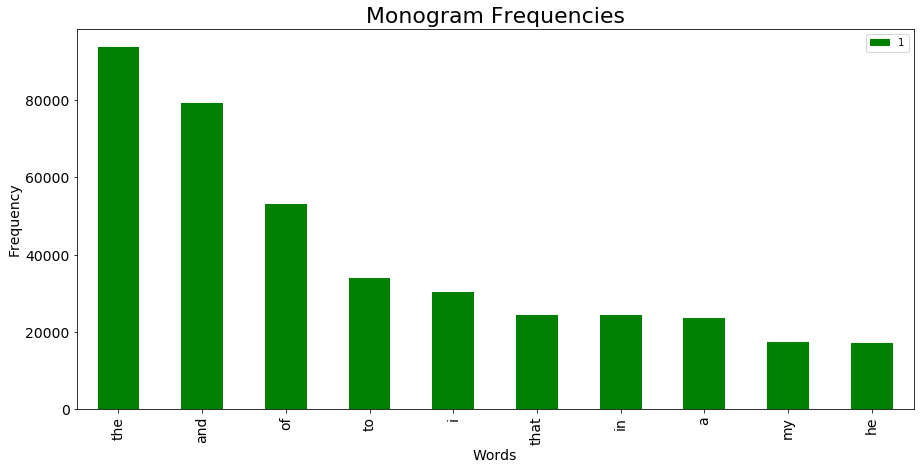

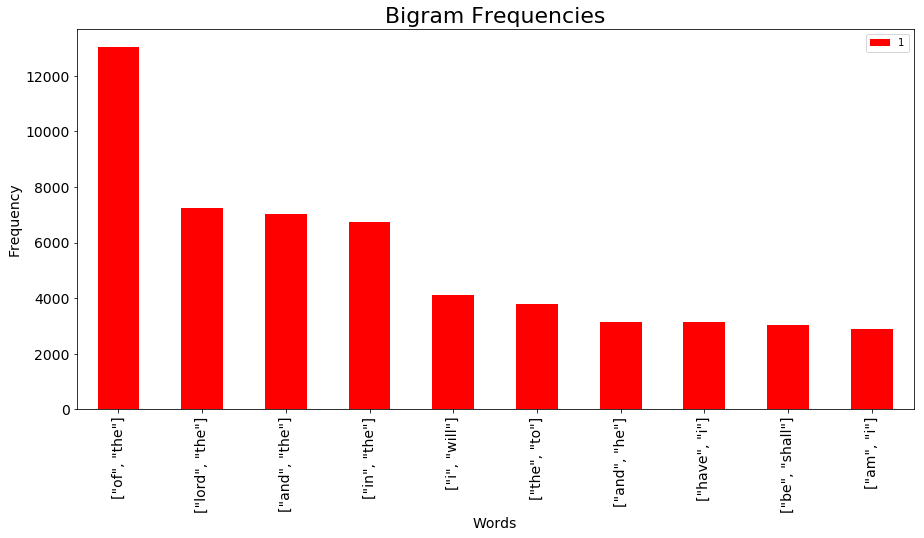

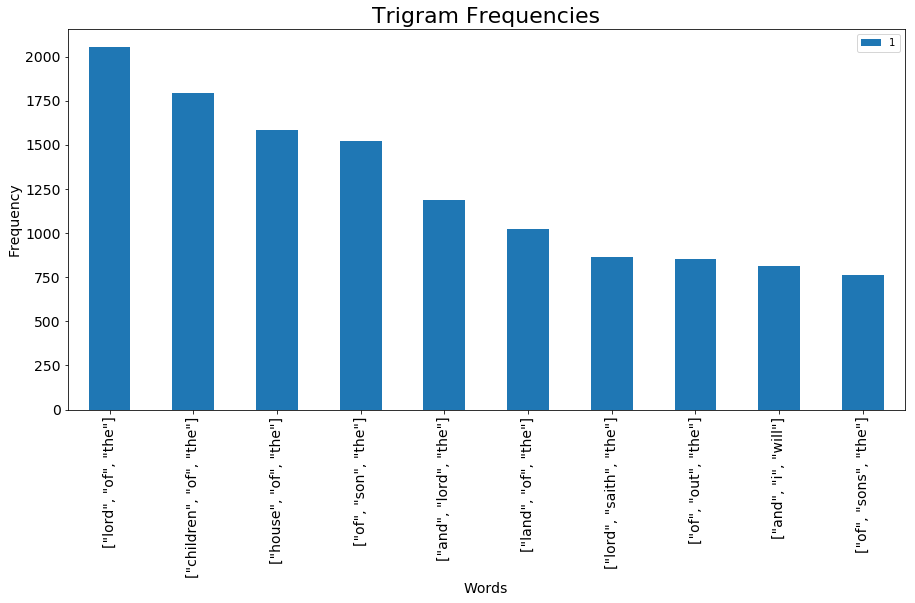

In [135]:
import matplotlib.pyplot as plt
plot1 = Monogram_data.plot(x=0, y=1, kind="bar", figsize=(15, 7), fontsize=14,color="green") 
plot1.set_title('Monogram Frequencies', fontsize=22)
plot1.set_ylabel("Frequency", fontsize=14)
plot1.set_xlabel("Words", fontsize=14)
plt.show()
plot2 = Bigram_data.plot(x=0, y=1, kind="bar", figsize=(15, 7), fontsize=14,color="red") 
plot2.set_title('Bigram Frequencies', fontsize=22)
plot2.set_ylabel("Frequency", fontsize=14)
plot2.set_xlabel("Words", fontsize=14)
plt.show()
plot3 = Trigram_data.plot(x=0, y=1, kind="bar", figsize=(15, 7), fontsize=14)
plot3.set_title('Trigram Frequencies', fontsize=22)
plot3.set_ylabel("Frequency", fontsize=14)
plot3.set_xlabel("Words", fontsize=14)
plt.show()

## For greater than a score of 3 
###  Create a TD - IDF implementation and 
### Analyze the following Sherlock Holmes book from Project Gutenberg text versions of :
The Adventures of Sherlock Holmes-  http://www.gutenberg.org/ebooks/1661.txt.utf-8

A Study in Scarlet - http://www.gutenberg.org/files/244/244-0.txt

The Hound of the Baskervilles - http://www.gutenberg.org/files/2852/2852-0.txt

The Return of Sherlock Holmes - http://www.gutenberg.org/files/108/108-0.txt

The Sign of the Four - http://www.gutenberg.org/ebooks/2097.txt.utf-8

### Display the scores for the top 20 highest frequencty terms and the relationship to the books



In [155]:
import urllib
url1 = 'http://www.gutenberg.org/cache/epub/1661/pg1661.txt'
url2 = 'http://www.gutenberg.org/files/244/244-0.txt'
url3 = 'http://www.gutenberg.org/files/2852/2852-0.txt'
url4 = 'http://www.gutenberg.org/files/108/108-0.txt'
url5 = 'http://www.gutenberg.org/ebooks/2097.txt.utf-8'

matter1 = urllib.urlopen(url1).read()
f1 = open('The_Adventures_of_Sherlock_Holmes.txt', 'w')
f1.write(matter1)
f1.close()

matter2 = urllib.urlopen(url2).read()
f2 = open('A_Study_in_Scarlet.txt', 'w')
f2.write(matter2)
f2.close()

matter3 = urllib.urlopen(url3).read()
f3 = open('The_Hound_of_the_Baskervilles.txt', 'w')
f3.write(matter3)
f3.close()

matter4 = urllib.urlopen(url4).read()
f4 = open('The_Return_of_Sherlock_Holmes.txt', 'w')
f4.write(matter4)
f4.close()

matter5 = urllib.urlopen(url1).read()
f5 = open('The_Sign_of_the_Four.txt', 'w')
f5.write(matter5)
f5.close()

In [156]:
%%capture MRMonogramFreqCount
%run MRMonogramFreqCount.py The_Adventures_of_Sherlock_Holmes.txt
%run MRMonogramFreqCount.py A_Study_in_Scarlet.txt
%run MRMonogramFreqCount.py The_Hound_of_the_Baskervilles.txt
%run MRMonogramFreqCount.py The_Return_of_Sherlock_Holmes.txt
%run MRMonogramFreqCount.py The_Sign_of_the_Four.txt

INFO:mrjob.conf:No configs found; falling back on auto-configuration
INFO:mrjob.runner:Creating temp directory c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.231017.598000
INFO:mrjob.sim:Running step 1 of 1...
INFO:mrjob.runner:Streaming final output from c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.231017.598000\output...
INFO:mrjob.runner:Removing temp directory c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.231017.598000...
INFO:mrjob.conf:No configs found; falling back on auto-configuration
INFO:mrjob.runner:Creating temp directory c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.231019.250000
INFO:mrjob.sim:Running step 1 of 1...
INFO:mrjob.runner:Streaming final output from c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.231019.250000\output...
INFO:mrjob.runner:Removing temp directory c:\users\srira\appdata\local\temp\MRMonogramFreqCount.sriram.20171017.231019.250000

In [158]:
with open('The_Adventures_of_Sherlock_Holmes_Freq.txt', 'w') as f: ## open the text file
    f.write(MRMonogramFreqCount.stdout)    ##write the content in a text file


In [159]:
File = pd.read_csv("The_Adventures_of_Sherlock_Holmes_Freq.txt", sep="\t", header=None)
sort_val = File.sort_values(1, ascending=False) ##sort the values from highest to lowest
print "The Adventures of Sherlock Holmes"
The_Adventures_of_Sherlock_Holmes_data = sort_val[[0,1]].head(20) ##display the top 20 words
The_Adventures_of_Sherlock_Holmes_data

The Adventures of Sherlock Holmes


,0,1
27782,the,6446
36190,the,5796
7500,the,5796
19774,the,3515
527,and,3069
29217,and,3069
24105,i,3007
20783,and,2989
3893,i,2961
32583,i,2961
